<a href="https://colab.research.google.com/github/amora201/NLPModel/blob/main/depress_detection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install neattext
import pandas as pd
import json
import numpy as np
import tensorflow as tf
import seaborn as sns
import neattext.functions as nfx
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 KB 4.6 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv("/content/Data10k_Csv.csv", skiprows=0)
df.head()

,Unnamed: 0,tweet_id,length of word,location,username,tweet,deEmoji,cleanTweet,sentiment,is_depress,date
0,0,1.330000e+18,115,Jawa Barat,mamake_iam,mungkin kau selalu menduga\r\ndiriku tak perna...,mungkin kau selalu menduga diriku tak pernah m...,mungkin kau selalu menduga diriku tidak pernah...,Terindikasi Depresi,0,11/18/2020 15:43
1,1,1.330000e+18,90,Jawa Barat,atdarebel_05,Aku tidak kehilangan seorang teman pun. Aku ha...,aku tidak kehilangan seorang teman pun aku ha...,aku tidak kehilangan seorang teman pun aku han...,Terindikasi Depresi,0,11/18/2020 15:41
2,2,1.330000e+18,268,Jawa Barat,wasikjogja,Manusia tidak akan pernah selesai dengan selur...,manusia tidak akan pernah selesai dengan selu...,manusia tidak akan pernah selesai dengan selur...,Tidak Terindikasi,1,11/18/2020 15:40
3,3,1.330000e+18,246,Jawa Barat,RifqiMI,Aku menyesal bahwa selama ini aku tidak pernah...,aku menyesal bahwa selama ini aku tidak perna...,aku menyesal bahwa selama ini aku tidak pernah...,Tidak Terindikasi,1,11/18/2020 15:39
4,4,1.330000e+18,162,Jawa Barat,bekna_sapa,Jangan pernah merasa sendiri lihatlah aku yang...,jangan pernah merasa sendiri lihatlah aku yan...,jangan pernah merasa sendiri lihatlah aku yang...,Terindikasi Depresi,0,11/18/2020 15:33


In [ ]:
df['sentiment'].value_counts()

Tidak Terindikasi      5617
Terindikasi Depresi    4465
Name: sentiment, dtype: int64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

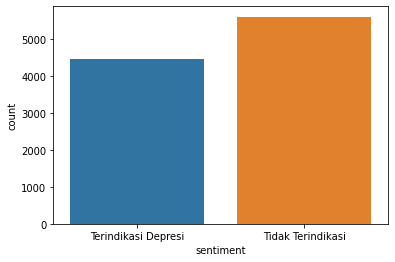

In [ ]:
sns.countplot(x='sentiment', data=df)

In [ ]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

###First Model###

In [ ]:
sentences = df['cleanTweet']
labels = df['is_depress']

In [ ]:
training_size = 20000

train_sentences = sentences[0:training_size]
test_sentences = sentences[training_size:]

train_labels = labels[0:training_size]
test_labels = labels[training_size:]

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(sentences, labels, test_size = 0.25, stratify = labels)

In [ ]:
vocab_size = 20000
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_seq = tokenizer.texts_to_sequences(xtrain)
train_pad = pad_sequences(train_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_seq = tokenizer.texts_to_sequences(xtest)
test_pad = pad_sequences(test_seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)

train_labels = np.array(ytrain)
test_labels = np.array(ytest)

print(train_labels.shape)
print(test_labels.shape)

print(f'number of words in word_index: {len(word_index)}')
print(f'word_index: {word_index}')
print()
# Print a sample headline
index = 2
print(f'sample headline: {sentences[index]}')
print(f'padded sequence: {train_pad[index]}')
print()

(7561,)
(2521,)
number of words in word_index: 10882
word_index: {'<OOV>': 1, 'aku': 2, 'tidak': 3, 'pernah': 4, 'yang': 5, 'kamu': 6, 'dan': 7, 'selalu': 8, 'tapi': 9, 'sendiri': 10, 'orang': 11, 'itu': 12, 'akan': 13, 'ini': 14, 'di': 15, 'ada': 16, 'untuk': 17, 'sama': 18, 'karena': 19, 'bisa': 20, 'dengan': 21, 'sudah': 22, 'apa': 23, 'kalau': 24, 'dia': 25, 'saja': 26, 'kita': 27, 'dari': 28, 'ya': 29, 'tau': 30, 'sakit': 31, 'jadi': 32, 'lagi': 33, 'diri': 34, 'kau': 35, 'juga': 36, 'banget': 37, 'dalam': 38, 'seperti': 39, 'hanya': 40, 'dulu': 41, 'baik': 42, 'ke': 43, 'sampai': 44, 'mau': 45, 'lebih': 46, 'harus': 47, 'lain': 48, 'jangan': 49, 'hati': 50, 'menjadi': 51, 'adalah': 52, 'jika': 53, 'cinta': 54, 'semua': 55, 'buat': 56, 'hari': 57, 'hal': 58, 'saat': 59, 'memang': 60, 'punya': 61, 'terus': 62, 'bukan': 63, 'seseorang': 64, 'rasa': 65, 'diriku': 66, 'benar': 67, 'kenapa': 68, 'atau': 69, 'teman': 70, 'mungkin': 71, 'sekarang': 72, 'masih': 73, 'mereka': 74, 'ingin':

In [ ]:
embedding_dim = 64
filters = 64
kernel_size = 3
dense_dim = 16

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.Conv1D(32, kernel_size, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

matrik = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=matrik)

model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 120, 64)           1280000   
                                                                 
 conv1d_34 (Conv1D)          (None, 118, 64)           12352     
                                                                 
 conv1d_35 (Conv1D)          (None, 116, 32)           6176      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 58, 32)           0         
 1D)                                                             
                                                                 
 dropout_20 (Dropout)        (None, 58, 32)            0         
                                                                 
 flatten_3 (Flatten)         (None, 1856)              0         
                                                     

In [ ]:
history = model.fit(train_pad, train_labels, epochs=10, validation_data=(test_pad, test_labels))

Epoch 1/10
7561/7561 [==============================] - 170s 22ms/step - loss: 0.5427 - accuracy: 0.7035 - precision: 0.7172 - recall: 0.7723 - val_loss: 0.3449 - val_accuracy: 0.8659 - val_precision: 0.8897 - val_recall: 0.8669
Epoch 2/10
7561/7561 [==============================] - 162s 21ms/step - loss: 0.2105 - accuracy: 0.9204 - precision: 0.9267 - recall: 0.9307 - val_loss: 0.2358 - val_accuracy: 0.9167 - val_precision: 0.9247 - val_recall: 0.9260
Epoch 3/10
7561/7561 [==============================] - 157s 21ms/step - loss: 0.1010 - accuracy: 0.9656 - precision: 0.9680 - recall: 0.9703 - val_loss: 0.2545 - val_accuracy: 0.9278 - val_precision: 0.9244 - val_recall: 0.9480
Epoch 4/10
7561/7561 [==============================] - 157s 21ms/step - loss: 0.0670 - accuracy: 0.9767 - precision: 0.9787 - recall: 0.9796 - val_loss: 0.2902 - val_accuracy: 0.9282 - val_precision: 0.9158 - val_recall: 0.9594
Epoch 5/10
7561/7561 [==============================] - 162s 21ms/step - loss: 0.048

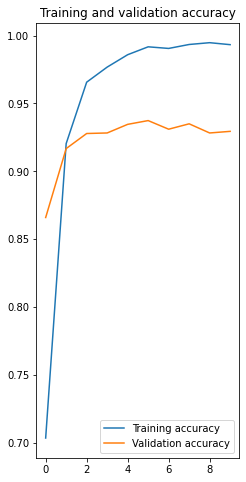

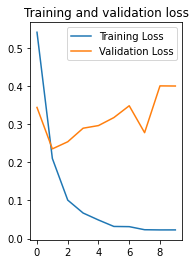

In [ ]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, acc, label='Training accuracy')
  plt.plot(epochs, val_acc, label='Validation accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and validation accuracy')

  plt.figure()
  plt.subplot(1, 2, 2)
  plt.plot(epochs, loss, label='Training Loss')
  plt.plot(epochs, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and validation loss')
 
  plt.show()
# Plot training results
plot_loss_acc(history)

In [ ]:
model.save('depresiIndo3.h5')

In [ ]:
y_predict = model.predict(test_pad)

79/79 [==============================] - 1s 10ms/step


In [ ]:
y_predict = np.where(y_predict > 0.5, 1, 0)
y_predict 

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
cm = confusion_matrix(test_labels, y_predict)
cm

array([[1031,   85],
       [  93, 1312]])

Text(33.0, 0.5, 'ketepatan')

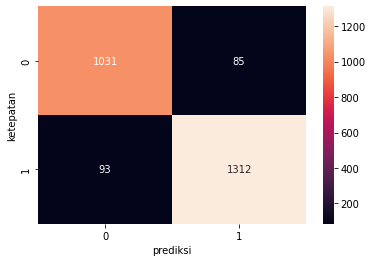

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("prediksi")
plt.ylabel("ketepatan")

In [ ]:
print(classification_report(test_labels, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1116
           1       0.94      0.93      0.94      1405

    accuracy                           0.93      2521
   macro avg       0.93      0.93      0.93      2521
weighted avg       0.93      0.93      0.93      2521



In [ ]:
contoh = "Bunuh diri tidak buruk"
model.predict([contoh])

ValueError: ignored

###Second Model###

In [ ]:
! pip install sklearn-CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement sklearn-CountVectorizer (from versions: none)
ERROR: No matching distribution found for sklearn-CountVectorizer


In [ ]:
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr.fit(xtrain, ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [ ]:
pipe_lr.score(xtest, ytest)

0.9285997619992067

In [ ]:
ex = "liburan bersama keluarga"

pipe_lr.predict([ex])

array(['Terindikasi Depresi'], dtype=object)

In [ ]:
pipe_lr.predict_proba([ex])

array([[0.82353898, 0.17646102]])

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('depresiIndo3.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 120, 64)           1280000   
                                                                 
 reshape (Reshape)           (None, 120, 64)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 118, 64)           12352     
                                                                 
 global_max_pooling1d_5 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                1040      
                                                      

In [ ]:
with open('./DataDepresi10k.json', 'r') as f:
  datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
  sentences.append(item['cleanTweet'])
  labels.append(item['is_depress'])